# **Hyperparameter Optimization**

We will cover hyperparameter optimization methods in this notebook. Beside we will answer the questions like what is optimization, what kind of methods are used for this. Used dataset in this notebook is selected as challenging to see how hyperparameter optimization affects the results.

![Optimization](https://www.mn.uio.no/ifi/studier/masteroppgaver/asr/hypergrad-learning-curves.png)

---


**Covered Methods:**
*    Random Search Optimization
*    Grid Search Optimization
*    Bayesian Optimization


---


Different methods of Machine Learning will be used on the dataset for evaluation of optimization techniques. 

**Used Dataset:**

*   [Predict 5-Year Career Longevity for NBA Rookies](https://data.world/exercises/logistic-regression-exercise-1) 🏀 \





## Preperation

* Mount drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## About Dataset

In [ ]:
import pandas as pd

df =  pd.read_csv('/content/drive/MyDrive/Applied AI #6 Source/data/nba_logreg.csv')

![Dataset](https://data.world/api/exercises/dataset/logistic-regression-exercise-1/file/raw/Screen%20Shot%202017-01-25%20at%2010.20.38%20AM.png)

In [ ]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


### General Information About Data

*  Can be looked for outliers.
*  Missing values can be filled.
*  Normalization can be helpful for model.
*  These operations are optional for better performance but we will try to increase our performance with hyperparameter optimization.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.0,82.0
MIN,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.9,40.9
PTS,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.8,28.2
FGM,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.4,10.2
FGA,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.5,19.8
FG%,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.9,73.7
3P Made,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.4,2.3
3PA,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.2,6.5
3P%,1329.0,19.308126,16.022916,0.0,0.000,22.40,32.5,100.0
FTM,1340.0,1.297687,0.987246,0.0,0.600,1.00,1.6,7.7


* There are missing values in 3P% column:

In [ ]:
df.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

* Target variable typecasted as integer.
* 11 nan values in the 3P% column filled with the mean of this column.
* Name column is dropped.

In [ ]:
df['TARGET_5Yrs'] = df['TARGET_5Yrs'].astype(int)
df['3P%'] = df['3P%'].fillna(value=df['3P%'].mean())
df = df.drop(['Name'], axis=1)

* Number of unique values in columns:

In [ ]:
for i in df.columns:
    print(f'{i} --> {df[i].nunique()}')

GP --> 70
MIN --> 325
PTS --> 191
FGM --> 87
FGA --> 159
FG% --> 284
3P Made --> 23
3PA --> 54
3P% --> 255
FTM --> 59
FTA --> 76
FT% --> 383
OREB --> 44
DREB --> 74
REB --> 101
AST --> 77
STL --> 26
BLK --> 28
TOV --> 41
TARGET_5Yrs --> 2


* Classes are not imbalanced much in this dataset:

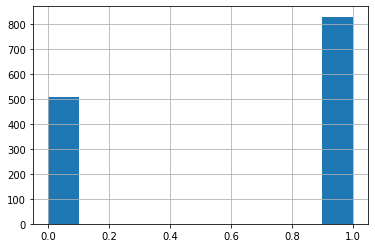

In [ ]:
df['TARGET_5Yrs'].hist()



## Classification with Random Forest without Optimization

* We will use default parameters of random forest for training. 
* Then use these results to compare with trainings with optimization methods.

### Imports

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

* Visualization for confusion matrix.

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha="right")
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha="right")
  plt.xlabel("Prediction")
  plt.ylabel("Ground Truth")

* Show different metric results, confusion matrix and ROC Curve for the given predictions and ground truth labels.

In [ ]:
def show_results(gt, predictions, predictions_prob):
  print("Results: \n")
  print("Accuracy  : ", accuracy_score(gt, predictions))
  print("F1 Score  : ", f1_score(gt, predictions))
  print("Roc Auc Score : ", roc_auc_score(gt, predictions))

  show_confusion_matrix(confusion_matrix(gt, predictions))

  y_score = predictions_prob
  fpr, tpr, _ = roc_curve(gt, y_score)

  plt.title('Random Forest ROC curve: CC Fraud')
  plt.xlabel('FPR (Precision)')
  plt.ylabel('TPR (Recall)')
  plt.show()
  plt.plot(fpr,tpr)
  plt.plot((0,1), ls='dashed',color='black')
  plt.show()
  print ('Area under curve (AUC): ', auc(fpr,tpr))

### Train Test Split

* Train set and test set have the same class ratio thanks to **_stratify_** parameter.

In [ ]:
X = df.drop(['TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=43)

In [ ]:
X_test  = X_test.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

### Model Definition and Training 

* Training with default parameters:

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

### Evaluation with Train Set and Test Set

In [ ]:
predictions = model.predict(X_train)
predictions_prob = model.predict_proba(X_train)[:,1]

* Train set results:

Results: 

Accuracy  :  0.9872068230277186
F1 Score  :  0.9897084048027445
Roc Auc Score :  0.9858730066797946


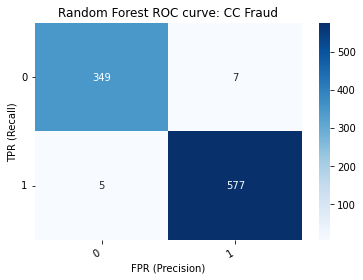

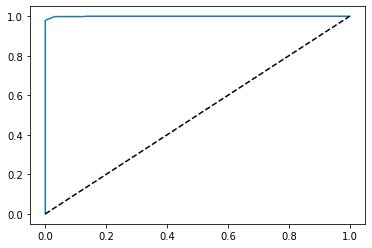

Area under curve (AUC):  0.9994811575736515


In [ ]:
show_results(y_train, predictions, predictions_prob)

* Test set results:

In [ ]:
predictions = model.predict(X_test)
predictions_prob = model.predict_proba(X_test)[:,1]

Results: 

Accuracy  :  0.6666666666666666
F1 Score  :  0.7481203007518797
Roc Auc Score :  0.6250885896527285


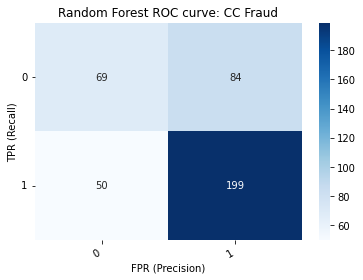

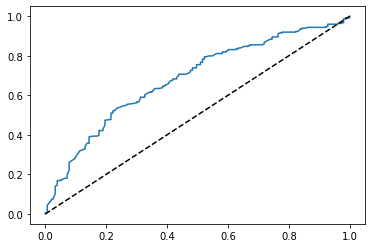

Area under curve (AUC):  0.6814841063600809


In [ ]:
show_results(y_test, predictions, predictions_prob)

## Random Search Optimization

![Optimization](https://i.gifer.com/O7ca.gif)

**Random Search** <br/><br/>
We have many hyperparameters in most machine learning methods and we have to select them before training. These hyperparameters can be selected from search space manually one or more time by inspiration if any optimization method is not used. In random search, these hyperparameters selected randomly from predefined boundiries of hyperparameter values and training is done with these hyperparameters. Results are compared with the results of next selection. If the result of next iteration better than current selection, these hyperparameters are taken to return.  <br /><br />
This process continues till the end of iterations and keep the maximum results.<br /><br />

> **Hyperparameter:** Model configuration argument specified by the developer to guide the learning process for a specific dataset.
 
> **Search Space:** Volume to be searched where each dimension represents a hyperparameter and each point represents one model configuration.


### Imports

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

### Define Model with Default Parameters

In [ ]:
model = RandomForestClassifier()

### Seach Space

* Search space for selected hyperparameters.
* These can be varied as wished.
* If boundiries selected non-properly, these fits fail and reported. 

In [ ]:
parameters = {
    'n_estimators': sp_randInt(10, 1000),
    'criterion'   : ['gini', 'entropy'],
    'max_depth'   : sp_randInt(1, 40),
    'max_samples' : sp_randInt(1,750)
}

### Random Search Training

* Estimator model is trained **n_iter** times which is defined by user.
* Cross Validation with 5 folds 

In [ ]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, n_iter = 100, n_jobs=-1, cv = 5)

In [ ]:
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feccd7cf310>,
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feccd7cf690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feccd7cfd10>})

* Best parameters which have returned best result with our dataset.

In [ ]:
randm.best_params_

{'criterion': 'gini', 'max_depth': 35, 'max_samples': 200, 'n_estimators': 491}

* Get predictions from best estimator:

In [ ]:
predictions = randm.best_estimator_.predict(X_test)
predictions_prob = randm.best_estimator_.predict_proba(X_test)[:,1]

* Results are improved compared to the default parameter training.

Results: 

Accuracy  :  0.6741293532338308
F1 Score  :  0.7542213883677299
Roc Auc Score :  0.6323726277659658


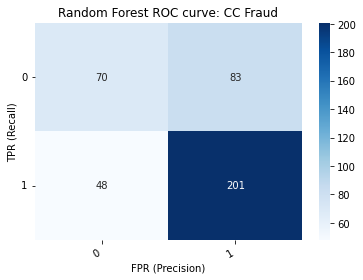

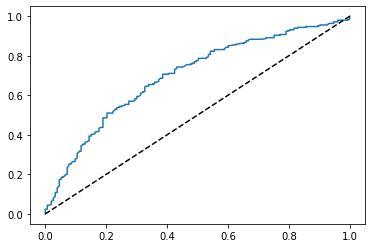

Area under curve (AUC):  0.6972071291702759


In [ ]:
show_results(y_test, predictions, predictions_prob)

## Grid Search Optimization

![Optimization](https://sigopt.com/wp-content/uploads/2016/07/3_boxes.gif)\
**Fig.** _Grid Search vs Random Search_

**Grid Search**

Grid Search is a method for hyperparameter optimization. Like with Random Search, there is also a search space for possible hyperparameter values with boundiries. However in this method, hyperparameters are selected from grid. This is an exhaustive search method.    


### Imports

In [ ]:
from sklearn.model_selection import GridSearchCV

### Define Model with Default Parameters

In [ ]:
model = RandomForestClassifier()

### Search Space

* Search space for selected hyperparameters.
* These can be varied as wished.
* If boundiries selected non-properly, these fits fail and reported. 

In [ ]:
parameters = {
    'n_estimators': [i for i in range(100, 1000, 50)],
    'criterion'   : ['gini', 'entropy'],
    'max_depth'   : [i for i in range(1, 40, 5)],
    'max_samples' : [i for i in range(100, 750, 50)],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5]
}

parameters = {
    'n_estimators': [i for i in range(400, 1000, 200)],
    'max_depth'   : [i for i in range(40, 100, 20)],
    'max_samples' : [i for i in range(200, 800, 200)]
}

### Grid Search Training

* Training will be done with every combination of hyperparameter values, so number of values can be limited because of time consumption.

* Cross Validation with 3 folds.

In [ ]:
gridm = GridSearchCV(estimator = model, param_grid = parameters, cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
gridm.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [40, 60, 80],
                         'max_samples': [200, 400, 600],
                         'n_estimators': [400, 600, 800]},
             return_train_score=True, verbose=2)

* Best parameters which have returned best result with our dataset.

In [ ]:
gridm.best_params_

{'max_depth': 60, 'max_samples': 200, 'n_estimators': 600}

* Get predictions from best estimator:

In [ ]:
predictions = gridm.best_estimator_.predict(X_test)
predictions_prob = gridm.best_estimator_.predict_proba(X_test)[:,1]

* Results are improved compared to the default parameter training.

Results: 

Accuracy  :  0.6741293532338308
F1 Score  :  0.7523629489603024
Roc Auc Score :  0.6348925112213559


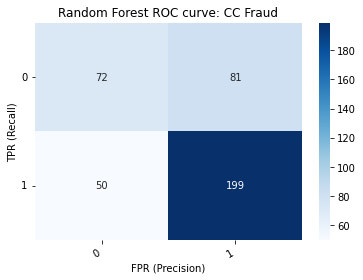

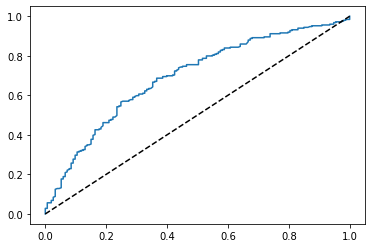

Area under curve (AUC):  0.6932829356642254


In [ ]:
show_results(y_test, predictions, predictions_prob)

## Bayesian Optimization

![Optimization](https://upload.wikimedia.org/wikipedia/commons/0/02/GpParBayesAnimationSmall.gif)

**Bayesian Optimization**

[Bayesian Optimization](https://machinelearningmastery.com/what-is-bayesian-optimization/) provides a principled technique based on **Bayes Theorem** to direct a search of a global optimization problem that is efficient and effective. It works by building a probabilistic model of the objective function, called the **surrogate function**, that is then searched efficiently with an **acquisition function** before candidate samples are chosen for evaluation on the real objective function.

Bayesian Optimization is often used in applied machine learning to **tune the hyperparameters** of a given well-performing model on a validation dataset.



> **Acqusition Function:** The function that decides how the sample space is discovered.


> **Surrogate Function:** The surrogate model is a statistical probabilistic black box function used when performing bayesian optimization. Gaussian Process is used for surrogate model for bayesian optimization mostly.


* [Tutorial for Bayesian Optimization (Notebook)](https://drive.google.com/file/d/1JX_BjVFWdsTBOmEBI5tp39CsXnE8VAsI/view?usp=sharing)

* [Tutorial for Gaussian Process (Notebook)](https://drive.google.com/file/d/167m44zv6-zcQf_m4378WA0krqC9gBlHm/view?usp=sharing)

* [Gaussian Process Slides](https://github.com/gpschool/gpss20/blob/gh-pages/slides/Wilkinson2020.pdf)

* [Gaussian Process Lecture](https://www.youtube.com/watch?v=tkDYEAoN5Eo&list=PLZ_xn3EIbxZGcqHGFj-P_SI6OCXy8TfoL)












### Bayesian Optimization with Scikit Learn Wrapper

#### Imports and Installations

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.9 MB/s 


In [ ]:
import numpy as np
from skopt import BayesSearchCV

#### Search Space

In [ ]:
parameters = {
    'n_estimators': [i for i in range(100, 1000)],
    'criterion'   : ['gini', 'entropy'],
    'max_depth'   : [i for i in range(1, 40)],
    'max_samples' : [i for i in range(100, 750)],
    'min_samples_split': [i for i in range(2, 12)],
    'min_samples_leaf': [i for i in range(3, 6)]
}

#### Define Model with Default Parameters

In [ ]:
model = RandomForestClassifier()

#### Bayesian Optimization Training

In [ ]:
opt = BayesSearchCV(estimator = model,
                    search_spaces = parameters,
                    n_iter=30,
                    n_jobs=-1,
                    n_points = 10,  
                    return_train_score=True,
                    refit=True, #use best model
                    optimizer_kwargs={'base_estimator': 'GP'}) # Gaussian Process

In [ ]:
opt.fit(X_train, y_train)

BayesSearchCV(estimator=RandomForestClassifier(), n_iter=30, n_jobs=-1,
              n_points=10, optimizer_kwargs={'base_estimator': 'GP'},
              return_train_score=True,
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30, ...],
                             'max_samples': [100, 101, 102, 103, 104, 105, 106,
                                             107, 108, 109, 110, 111, 112, 113,
                                             114, 115, 116, 117, 118, 119, 120,
                                             121, 122, 123, 124, 125, 126, 127,
                                             128, 129, ...],
                             'min_samples_leaf': [3, 4, 5],
                          

In [ ]:
predictions = opt.predict(X_test)
predictions_prob = opt.predict_proba(X_test)[:,1]

Results: 

Accuracy  :  0.6741293532338308
F1 Score  :  0.7532956685499059
Roc Auc Score :  0.6336325694936609


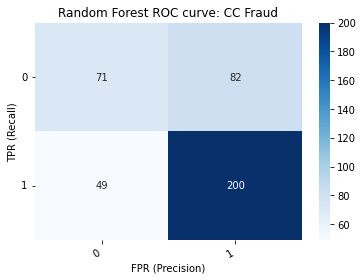

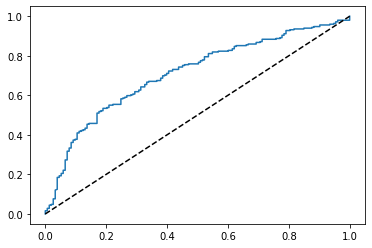

Area under curve (AUC):  0.708599102291519


In [ ]:
show_results(y_test, predictions, predictions_prob)

* Looking at the best parameters

In [ ]:
opt.best_params_

OrderedDict([('criterion', 'entropy'),
             ('max_depth', 31),
             ('max_samples', 378),
             ('min_samples_leaf', 3),
             ('min_samples_split', 11),
             ('n_estimators', 678)])

#### Visualizations


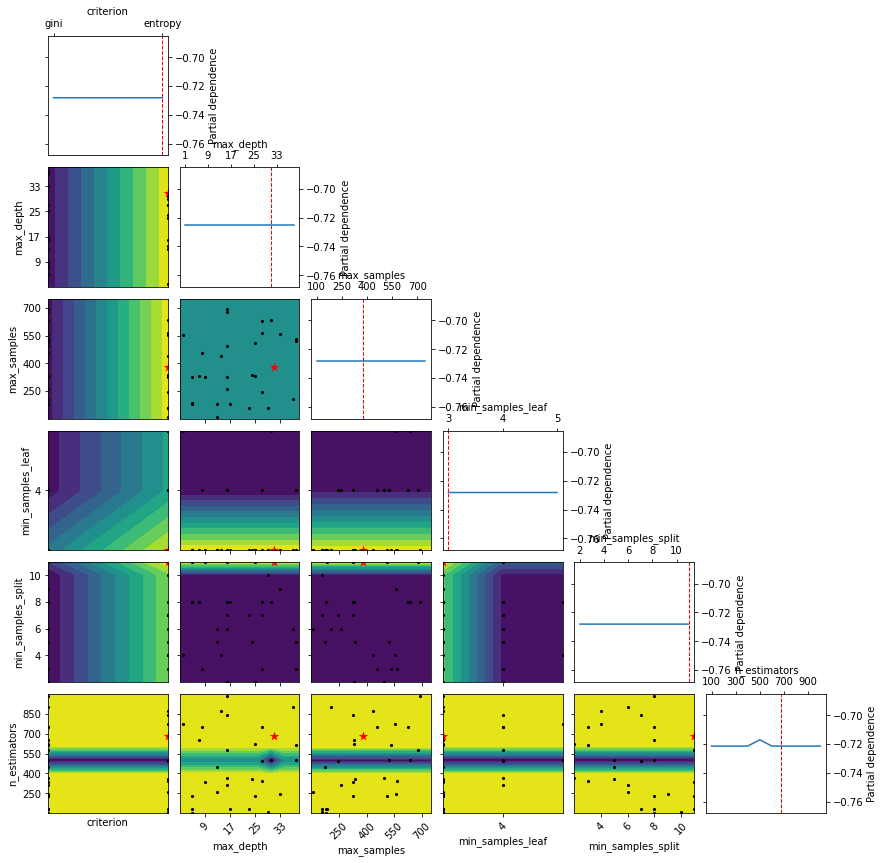

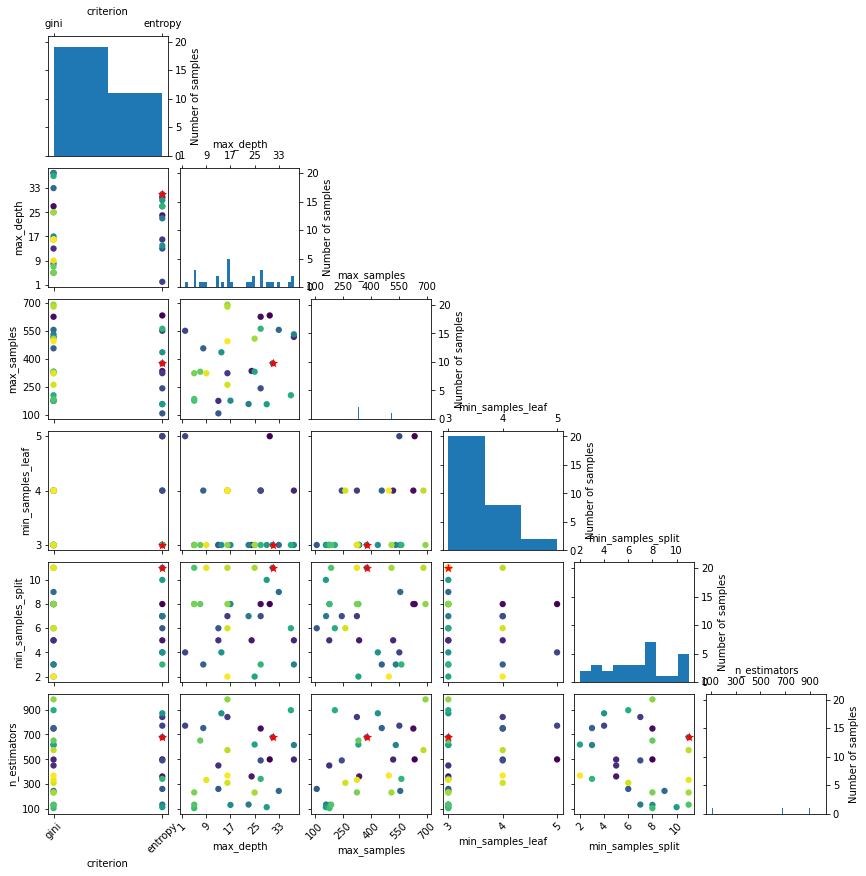

In [ ]:
from skopt.plots import plot_objective, plot_evaluations
import matplotlib.pyplot as plt

_ = plot_objective(opt.optimizer_results_[0], n_points=10, sample_source='result')
plt.show()
_ = plot_evaluations(opt.optimizer_results_[0])
plt.show()

### Bayesian Optimization with [BayesianOptimization](https://github.com/fmfn/BayesianOptimization) Library

* Install the library

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=10a47a590ff3d409643b33e8473bc6ba1a2b1c57f05144ea06930d867dee95f7
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


* Imports

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#### Black Box Function

* Thanks to flexibility of the library, we can define any black box function that takes parameters and returns a score.

* These parameters is the ones which will be optimized and return score is the evaluation metric for Bayesian Optimization.

In [ ]:
def black_box_function(n_estimators, max_depth, max_samples, min_samples_split, min_samples_leaf):
  
  # discretization for parameters (this can be done by another function as you wish)
  n_estimators, max_depth, max_samples, min_samples_split, min_samples_leaf = int(n_estimators), int(max_depth), int(max_samples), int(min_samples_split), int(min_samples_leaf)

  # model with given parameters
  model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_samples=max_samples, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

  # cross validation score for training data
  scores = cross_val_score(model, X_train, y_train, cv=5)

  #returns the mean of scores
  return scores.mean()

#### Boundaries

* Parameters are given the optimizer as tuples which are boundaries of related parameter.

In [ ]:
parameters = {
    'n_estimators': (100, 1000),
    'max_depth'   : (1, 40),
    'max_samples' : (100, 750),
    'min_samples_split': (2, 12),
    'min_samples_leaf': (3, 6)
}

#### Define and Maximize The Optimizer

* We define an optimizer with given black box function and parameter bounds.

In [ ]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=parameters
)

* Maximize function works with given initial points, number of iterations, acqusition function and its parameters.



> **Initial Points:** The method computes these points without optimization at the beginning. Selection of these points can be done randomly or by uniform distribution.


> **Number of Iterations:** Number of optimization steps.


> **Kappa Parameter:** Trade-off between exploration and exploatation for selected acqusition function (upper confidence bound).







In [ ]:
optimizer.maximize(
    init_points=10,
    n_iter=30,
    acq = 'ucb',
    kappa = 2.576 
)

|   iter    |  target   | max_depth | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.7239   |  27.95    |  455.7    |  3.803    |  5.56     |  794.4    |
|  2        |  0.726    |  18.29    |  534.4    |  3.506    |  5.186    |  685.8    |
|  3        |  0.726    |  17.44    |  225.2    |  5.455    |  8.482    |  739.0    |
|  4        |  0.7217   |  38.39    |  296.2    |  4.024    |  8.517    |  841.1    |
|  5        |  0.7239   |  19.83    |  666.1    |  4.437    |  5.614    |  861.2    |
|  6        |  0.7249   |  38.62    |  157.6    |  4.184    |  8.467    |  841.2    |
|  7        |  0.7218   |  11.08    |  370.7    |  3.599    |  8.708    |  768.8    |
|  8        |  0.7196   |  11.88    |  520.6    |  5.694    |  9.022    |  515.6    |
|  9        |  0.7217   |  28.92    |  628.5    |  5.734    |  11.94    |  500.4    |
|  10       |  0.7228   |  14.8     |  654.9    |  5.4

In [ ]:
optimizer.max

{'params': {'max_depth': 37.44443353432656,
  'max_samples': 120.48848067826653,
  'min_samples_leaf': 3.193089231611117,
  'min_samples_split': 2.1502833582242102,
  'n_estimators': 261.2273087217569},
 'target': 0.727050859028331}

In [ ]:
model = RandomForestClassifier(n_estimators= 261, max_depth= 37, max_samples= 120, min_samples_split= 2, min_samples_leaf= 3)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=37, max_samples=120, min_samples_leaf=3,
                       n_estimators=261)

In [ ]:
predictions = model.predict(X_test)
predictions_prob = model.predict_proba(X_test)[:,1]

Results: 

Accuracy  :  0.6691542288557214
F1 Score  :  0.747628083491461
Roc Auc Score :  0.630876446964328


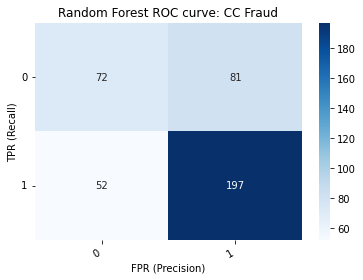

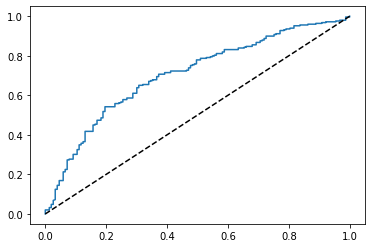

Area under curve (AUC):  0.7037955744546813


In [ ]:
show_results(y_test, predictions, predictions_prob)

#### Exploration and Exploitation

* **Exploration** can be said as exploring the least known areas in the parameter space.

* **Exploitation** is the opposite of that, pushing the points which are known that they have better performance.

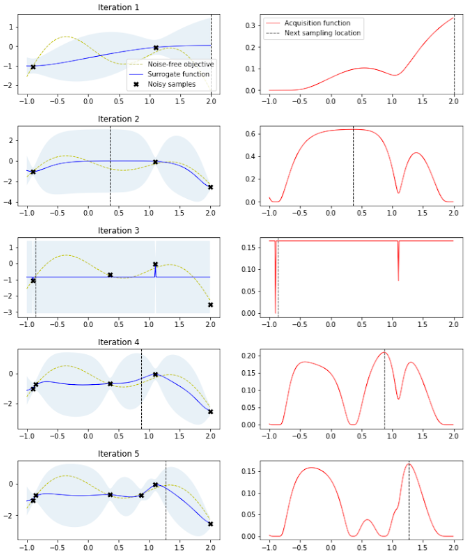

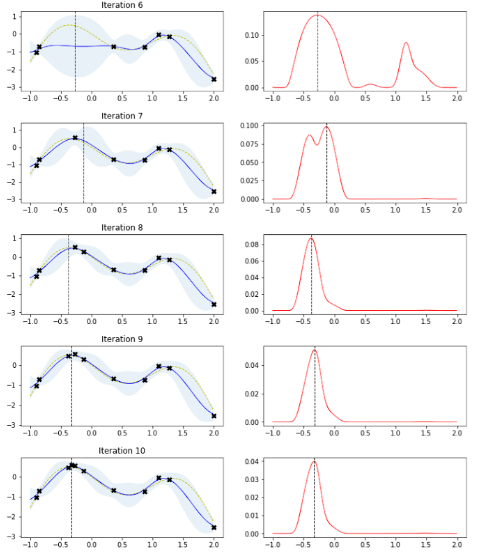

## AI Projects #7 - Bayesian Methods in Medical Imaging

* Optimizing data augmentation hyperparameters with Bayesian Optimization and Gaussian Process.

* We propose using Hyperparameter Optimization techniques such as Bayesian Optimization to select data augmentations.

* Project page: https://github.com/safakkbilici/bayesmedaug